In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('./bears')

In [3]:
class DataLoader(GetAttr):
    def __init__(self, *loaders): 
        self.loaders = loaders
    def __getitem__(self, i):
        return self.loaders[i]
    train, valid = add_props(lambda i, self: self[i])

In [4]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [5]:
dls = bears.dataloaders(path)

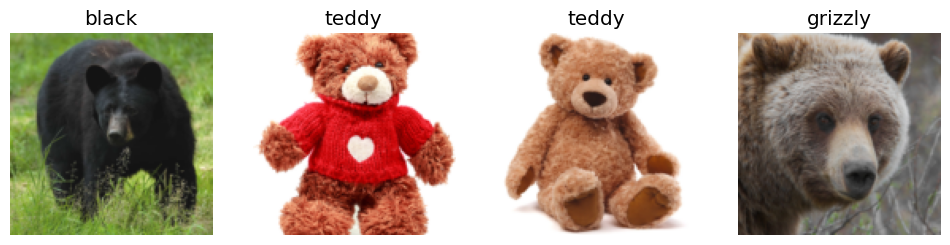

In [6]:
dls.valid.show_batch(max_n=4, nrows = 1)

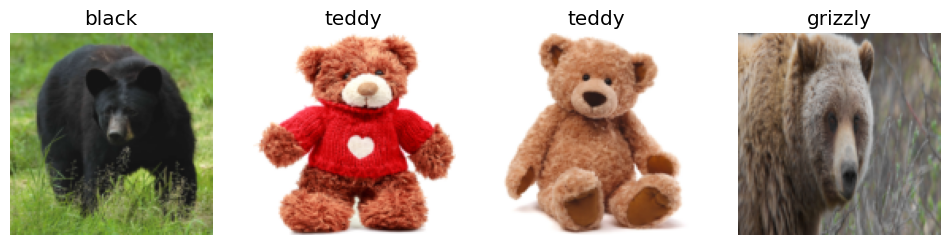

In [7]:
# squish/stretch images
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

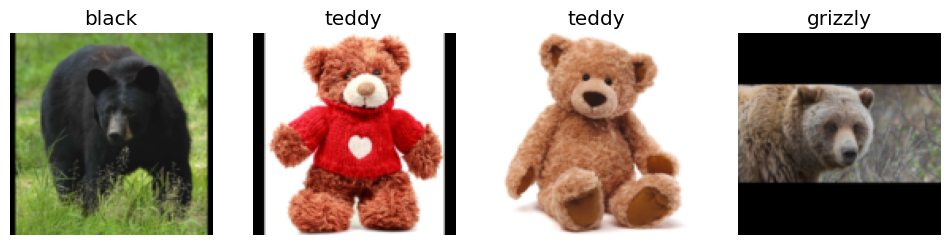

In [8]:
# padding with zeros
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

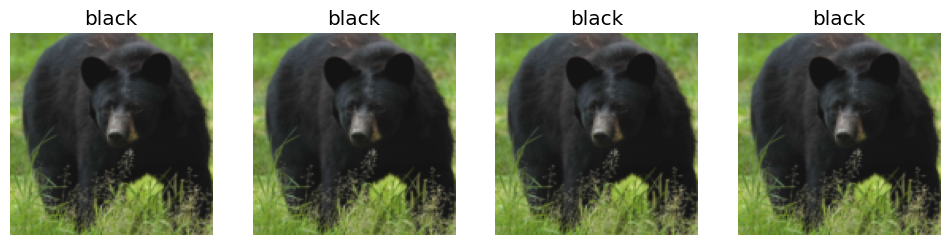

In [9]:
#RandomResizedCrop
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation 
1. What is it ? and why do we need it ? 

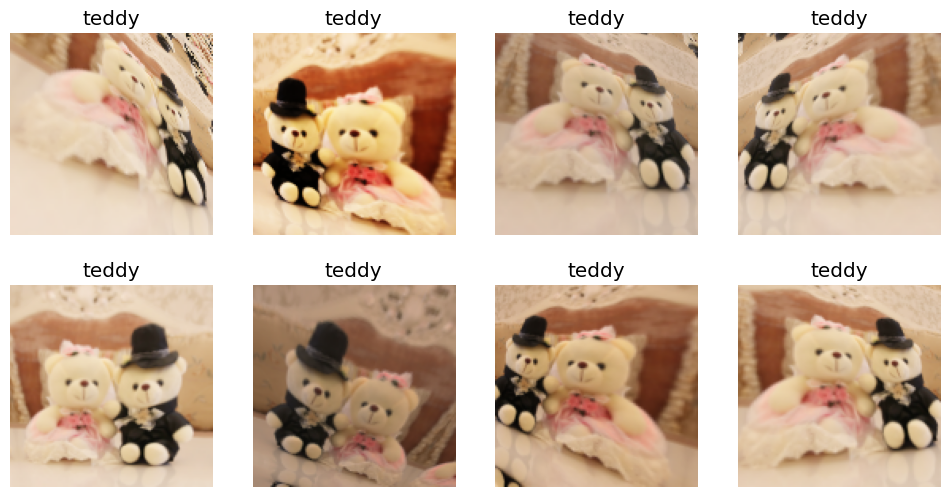

In [10]:
bears = bears.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms())
dls = bears.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

c:\Users\SamithVa\anaconda3\envs\pytorch\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.669053,0.368353,0.157895,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.351597,0.070983,0.000000,00:24
1,0.256764,0.014470,0.000000,00:24
2,0.180560,0.005450,0.000000,00:23
3,0.140448,0.005969,0.000000,00:24


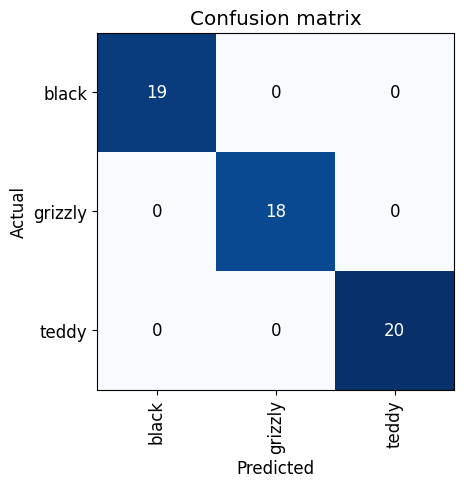

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

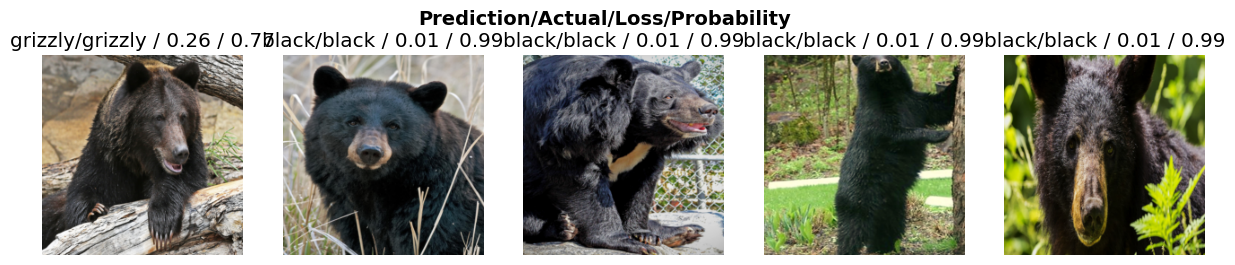

In [14]:
interp.plot_top_losses(5, nrows=1)

In [15]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
# save the model : architecture and trained parameters
learn.export()

In [17]:
# check if the file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [19]:
learn_inf.predict('images/grizzly-2.jpg')

('grizzly', tensor(1), tensor([7.4258e-04, 9.9925e-01, 1.0132e-05]))

In [20]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:
img = PILImage.create(btn_upload.data[-1])

In [25]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [26]:
pred, pred_idx, probs = learn_inf.predict(img)

In [27]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [28]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [31]:
VBox([widgets.Label('Select your bear!'),
btn_upload, btn_run, out_pl, lbl_pred])

In [32]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/3.9 MB 798.9 kB/s eta 0:00:05
   - -------------------------------------- 0.1/3.9 MB 708.1 kB/s eta 0:00:06
   - -------------------------------------- 0.2/3.9 MB 614.4 kB/s eta 0:00:07
   - -------------------------------------- 0.2/3.9 MB 614.4 kB/s eta 0:00:07
   - -------------------------------------- 0.2/3.9 MB 551.6 kB/s eta 0:00:07
   - -------------------------------------- 0.2/3.9 MB 513.4 kB/s eta 0:00:08
   -- ------------------------------------- 0.2/3

Enabling: voila
- Writing config: C:\Users\SamithVa\anaconda3\etc\jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
